LOADING THE DATASET INTO A SPARK DATAFRAME

In [0]:
# Loading the dataset into a DataFrame
df = spark.read.csv("/FileStore/tables/FaultDataset.csv", header=True, inferSchema=True)

EXPLORATORY DATA ANALYSIS

In [0]:
# View the first five rows of the dataset
df.show(5)

+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+
|        1|        2|        3|        4|        5|        6|        7|        8|        9|       10|       11|       12|       13|       14|       15|       16|       17|       18|       19|       20|fault_detected|
+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+--------------+
|0.3503125|0.3496875|     0.35|0.3459375|   0.3475|0.3459375| 0.341875|0.3434375|    0.355|0.3553125|0.3459375|   0.3525|   0.3575|0.3590625|  0.35875|0.3484375|0.3590625|     0.35|0.3559375|0.3490625|             0|
|0.5090625| 0.484375| 0.046875| 0.071875|     0.06|0.0634375|   0.0575|0.0546875|0.0559375| 0.058125|0.0628125| 0.065625|0.0640625|0

In [0]:
# Display the Schema and data types of each columns
df.printSchema()

root
 |-- 1: double (nullable = true)
 |-- 2: double (nullable = true)
 |-- 3: double (nullable = true)
 |-- 4: double (nullable = true)
 |-- 5: double (nullable = true)
 |-- 6: double (nullable = true)
 |-- 7: double (nullable = true)
 |-- 8: double (nullable = true)
 |-- 9: double (nullable = true)
 |-- 10: double (nullable = true)
 |-- 11: double (nullable = true)
 |-- 12: double (nullable = true)
 |-- 13: double (nullable = true)
 |-- 14: double (nullable = true)
 |-- 15: double (nullable = true)
 |-- 16: double (nullable = true)
 |-- 17: double (nullable = true)
 |-- 18: double (nullable = true)
 |-- 19: double (nullable = true)
 |-- 20: double (nullable = true)
 |-- fault_detected: integer (nullable = true)



In [0]:
# Descriptive statistics of the first two rows
df.describe().show(2)

+-------+-------------------+-------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+-------------------+------------------+-------------------+------------------+------------------+-----------------+--------------+
|summary|                  1|                  2|                 3|                  4|                 5|                 6|                 7|                  8|                  9|                10|                11|                 12|                13|                14|                 15|                16|                 17|                18|                19|               20|fault_detected|
+-------+-------------------+-------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+-----------

In [0]:
# check the number of rows and columns
print("Number of rows: ", df.count())
print("Number of columns: ", len(df.columns))

Number of rows:  9292
Number of columns:  21


In [0]:
# Using display to view the DataFrame
df.display()

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 fault_detected 0.3503125 0.3496875 0.35 0.3459375 0.3475 0.3459375 0.341875 0.3434375 0.355 0.3553125 0.3459375 0.3525 0.3575 0.3590625 0.35875 0.3484375 0.3590625 0.35 0.3559375 0.3490625 0 0.5090625 0.484375 0.046875 0.071875 0.06 0.0634375 0.0575 0.0546875 0.0559375 0.058125 0.0628125 0.065625 0.0640625 0.0634375 0.0534375 0.084375 0.0615625 0.05375 0.076875 0.056875 0 0.0928125 0.0975 0.1096875 0.1025 0.09625 0.1053125 0.09875 0.098125 0.091875 0.0909375 0.09875 0.103125 0.1 0.1034375 0.1015625 0.0978125 0.0990625 0.10375 0.098125 0.1040625 0 0.09375 0.089375 0.091875 0.0996875 0.0909375 0.096875 0.0940625 0.096875 0.096875 0.099375 0.099375 0.0959375 0.0959375 0.0940625 0.09125 0.0996875 0.09375 0.0934375 0.0971875 0.094375 0 0.036875 0.0440625 0.038125 0.0428125 0.0353125 0.0340625 0.033125 0.0403125 0.0346875 0.036875 0.035625 0.03625 0.0409375 0.039375 0.035 0.040625 0.0384375 0.036875 0.04 0.0371875 0 0.135625 0.3034375 0.13875 0.140625 0.126875 0.130625 0.139375 0.143125 0.1290625 0.140625 0.1340625 0.1396875 0.1384375 0.1453125 0.1453125 0.1496875 0.1440625 0.1359375 0.1453125 0.14625 0 0.3446875 0.35125 0.3353125 0.3471875 0.34625 0.348125 0.3478125 0.3521875 0.3525 0.35125 0.3571875 0.360625 0.3640625 0.36625 0.3640625 0.3634375 0.3475 0.35375 0.1575 0.351875 0 0.036875 0.035625 0.03125 0.0375 0.0390625 0.034375 0.0315625 0.031875 0.0378125 0.0321875 0.0371875 0.038125 0.035 0.0353125 0.0325 0.03 0.0325 0.0321875 0.0321875 0.03125 0 0.0371875 0.039375 0.033125 0.04 0.04125 0.03875 0.035625 0.0384375 0.0378125 0.0365625 0.033125 0.0365625 0.03375 0.034375 0.0346875 0.04125 0.0365625 0.035 0.034375 0.0396875 0 0.3590625 0.3609375 0.360625 0.3590625 0.355 0.365 0.355625 0.358125 0.3575 0.3578125 0.355625 0.3584375 0.3521875 0.3459375 0.3521875 0.3509375 0.3525 0.35625 0.353125 0.3540625 0 0.034375 0.03875 0.0396875 0.0315625 0.0346875 0.0271875 0.0346875 0.036875 0.0340625 0.0321875 0.034375 0.0303125 0.0334375 0.038125 0.03625 0.0378125 0.035625 0.034375 0.035625 0.030625 0 0.0328125 0.031875 0.0359375 0.035625 0.0334375 0.033125 0.03125 0.0353125 0.0353125 0.0346875 0.0371875 0.036875 0.03375 0.029375 0.0325 0.0384375 0.0309375 0.039375 0.033125 0.0325 0 0.034375 0.03375 0.0390625 0.0334375 0.0428125 0.0340625 0.0365625 0.03625 0.0325 0.035625 0.04 0.204375 0.169375 0.1671875 0.1734375 0.1796875 0.1928125 0.190625 0.186875 0.1896875 0 0.034375 0.0325 0.0328125 0.0396875 0.031875 0.036875 0.0334375 0.03875 0.0384375 0.031875 0.035 0.038125 0.04 0.036875 0.03875 0.0409375 0.03875 0.035625 0.038125 0.033125 0 0.0353125 0.0334375 0.033125 0.035 0.0371875 0.03625 0.0346875 0.0378125 0.031875 0.0328125 0.0334375 0.034375 0.0378125 0.0384375 0.03125 0.0328125 0.0353125 0.03125 0.03 0.0340625 0 0.125625 0.1309375 0.148125 0.1378125 0.1315625 0.1309375 0.1415625 0.1425 0.1428125 0.155 0.140625 0.144375 0.135625 0.143125 0.1428125 0.13875 0.139375 0.1409375 0.140625 0.136875 0 0.3559375 0.3525 0.355 0.3621875 0.3515625 0.3659375 0.3528125 0.358125 0.3578125 0.3625 0.3628125 0.36 0.3534375 0.3615625 0.35625 0.3521875 0.3515625 0.3578125 0.3559375 0.3571875 0 0.035625 0.0321875 0.0359375 0.040625 0.035 0.036875 0.0334375 0.035 0.0378125 0.0328125 0.0365625 0.035 0.03625 0.040625 0.0359375 0.035625 0.0384375 0.0359375 0.0365625 0.0365625 0 0.0928125 0.0971875 0.0903125 0.0984375 0.09375 0.0978125 0.0971875 0.090625 0.1034375 0.091875 0.0984375 0.0934375 0.095625 0.101875 0.094375 0.0928125 0.09875 0.09375 0.0953125 0.0903125 0 0.1078125 0.1246875 0.1409375 0.128125 0.129375 0.101875 0.101875 0.111875 0.1171875 0.136875 0.1321875 0.1278125 0.1284375 0.133125 0.13875 0.13375 0.13 0.1290625 0.141875 0.1409375 0 0.3821875 0.3771875 0.3809375 0.38125 0.38 0.380625 0.375 0.3821875 0.379375 0.3740625 0.3625 0.3740625 0.101875 0.3709375 0.139375 0.1365625 0.3709375 0.19 0.14625 0.145625 0 0.3803125 0.3815625 0.3875 0.381875 0.379375 0.376875 0.3784375 0.379375 0.381875 0.3884375 0.3868

In [0]:
# Check the distribution of the target column
df.groupBy('fault_detected').count().show()

+--------------+-----+
|fault_detected|count|
+--------------+-----+
|             1| 4646|
|             0| 4646|
+--------------+-----+



In [0]:
# Check for missing values
from pyspark.sql.functions import col

missing_data_count = df.select([col(c).alias(c) for c in df.columns]).collect()[0]
print("Missing Values Count:")
for col, count in zip(df.columns, missing_data_count):
    print(f"{col}: {count}")

Missing Values Count:
1: 0.3503125
2: 0.3496875
3: 0.35
4: 0.3459375
5: 0.3475
6: 0.3459375
7: 0.341875
8: 0.3434375
9: 0.355
10: 0.3553125
11: 0.3459375
12: 0.3525
13: 0.3575
14: 0.3590625
15: 0.35875
16: 0.3484375
17: 0.3590625
18: 0.35
19: 0.3559375
20: 0.3490625
fault_detected: 0


In [0]:
# Correlation matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame
pdf = df.toPandas()

# Compute correlation matrix
corr_matrix = pdf.corr()

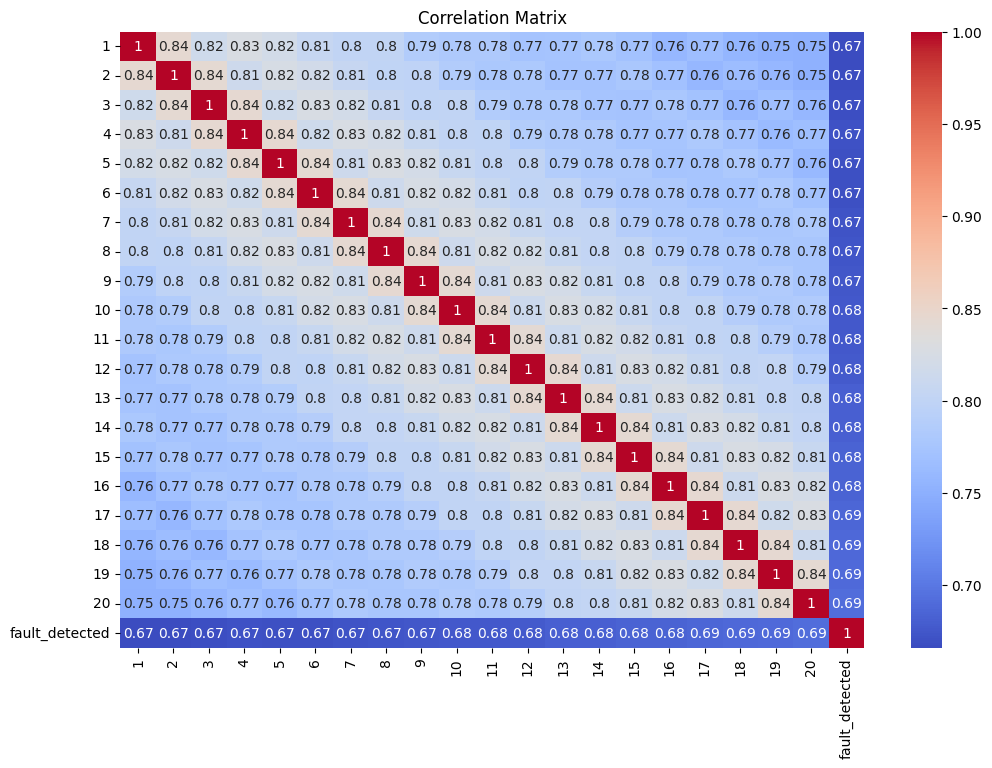

In [0]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

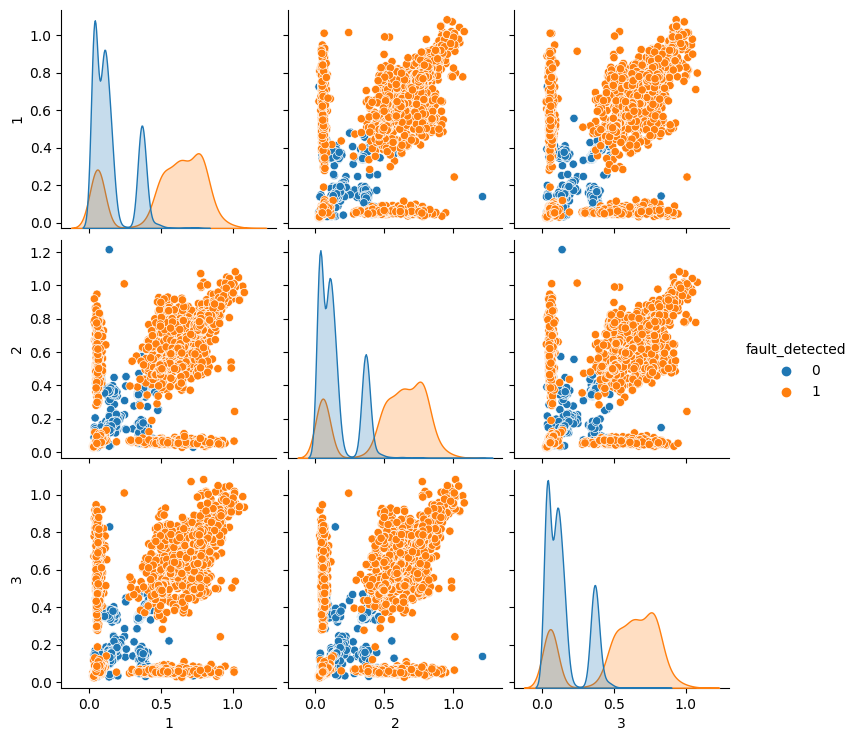

In [0]:
# Plot the pair plot for a subset of features
sns.pairplot(pdf, vars=['1', '2', '3'], hue='fault_detected')
plt.show()

In [0]:
pandas_df = df.toPandas()

DATA PREPROCESSING

In [0]:
# Since the dataset is already clean, there are no null values in the dataset.Before training the model, we need to split the dataset into training and test sets, and apply some feature engineering

# Importing the required library

from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [0]:
# Assembling the features into a single vector
assembler = VectorAssembler(inputCols=df.columns[:-1], outputCol="features")

In [0]:
# Spliting the data into training and test sets
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

In [0]:
# Creating the Decision Tree Classifier
dt = DecisionTreeClassifier(labelCol="fault_detected", featuresCol="features")

In [0]:
# Setting up the pipeline
pipeline = Pipeline(stages=[assembler, dt])

In [0]:
# Applying feature engineering to improve the model performance
from pyspark.ml.feature import StandardScaler

# Normalize the features
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)

# Update the pipeline to include the scaler
pipeline = Pipeline(stages=[assembler, scaler, dt])


In [0]:
# Setting up a parameter grid for hyperparameter tuning
paramGrid = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [5, 10, 15]) \
    .build()

In [0]:
# Setting up the cross-validator with 5 folds
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=MulticlassClassificationEvaluator(labelCol="fault_detected", metricName="accuracy"),
                          numFolds=5)

In [0]:
# Training the model
cvModel = crossval.fit(train_data)

EVALUATING THE MODEL'S PERFORMANCE

In [0]:
# After training the model, we evaluate its performance on the test set

# Make predictions on the test set
predictions = cvModel.transform(test_data)


# Evaluate the model

evaluator = MulticlassClassificationEvaluator(labelCol="fault_detected", predictionCol="prediction", metricName="accuracy")

accuracy = evaluator.evaluate(predictions)

print("Accuracy for DecisionTreeClassifier =%g " % (accuracy))

Accuracy for DecisionTreeClassifier =0.97095 


TRACKING THE EXPERIMENT WITH MLflow

In [0]:
import mlflow
import mlflow.spark

# Start a new MLflow run
with mlflow.start_run(run_name="decision_tree_classification") as run:
    # Log the hyperparameters
    mlflow.log_param("maxDepth", dt.getMaxDepth())
    mlflow.log_param("maxBins", dt.getMaxBins())
    mlflow.log_param("seed", 42)

    # Log the metrics
    mlflow.log_metric("accuracy", accuracy)

    # Log the model
    mlflow.spark.log_model(cvModel, "decision_tree_model")

# Stop the MLflow run
mlflow.end_run()

2023/04/25 15:10:23 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().


IMPLEMENTING EXTRA FEATURES

In [0]:
# Expanding the parameter grid in the 'ParamGridBuilder()'nto include more hyperparameters
paramGrid = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [5, 10, 15]) \
    .addGrid(dt.minInstancesPerNode, [1, 2, 4]) \
    .addGrid(dt.maxBins, [16, 32, 64]) \
    .build()

In [0]:
# Training additional classification algorithms 
# RandomForestClassifier

from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol="fault_detected", featuresCol="features")
pipeline_rf = Pipeline(stages=[assembler, rf])

paramGrid_rf = ParamGridBuilder() \
    .addGrid(rf.numTrees, [10, 20, 30]) \
    .addGrid(rf.maxDepth, [5, 10, 15]) \
    .build()

crossval_rf = CrossValidator(estimator=pipeline_rf,
                             estimatorParamMaps=paramGrid_rf,
                             evaluator=MulticlassClassificationEvaluator(labelCol="fault_detected", metricName="accuracy"),
                             numFolds=5)

cvModel_rf = crossval_rf.fit(train_data)

In [0]:
# Evaluating the model's performance
predictions_rf = cvModel_rf.transform(test_data)
accuracy_rf = evaluator.evaluate(predictions_rf)
print("Accuracy for RandomForest =%g " % (accuracy_rf))

Accuracy for RandomForest =0.973743 


In [0]:
# LogisticRegression

from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(labelCol="fault_detected", featuresCol="features")
pipeline_lr = Pipeline(stages=[assembler, lr])

paramGrid_lr = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 1.0]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

crossval_lr = CrossValidator(estimator=pipeline_lr,
                             estimatorParamMaps=paramGrid_lr,
                             evaluator=MulticlassClassificationEvaluator(labelCol="fault_detected", metricName="accuracy"),
                             numFolds=5)

cvModel_lr = crossval_lr.fit(train_data)


In [0]:
# Evaluating the model's performance
predictions_lr = cvModel_lr.transform(test_data)
accuracy_lr = evaluator.evaluate(predictions_lr)
print("Accuracy for LogisticRegression =%g " % (accuracy_lr))

Accuracy for LogisticRegression =0.802793 


In [0]:
# NaiveBayes

from pyspark.ml.classification import NaiveBayes

nb = NaiveBayes(labelCol="fault_detected", featuresCol="features")
pipeline_nb = Pipeline(stages=[assembler, nb])

paramGrid_nb = ParamGridBuilder() \
    .addGrid(nb.smoothing, [0.5, 1.0, 2.0]) \
    .build()

crossval_nb = CrossValidator(estimator=pipeline_nb,
                             estimatorParamMaps=paramGrid_nb,
                             evaluator=MulticlassClassificationEvaluator(labelCol="fault_detected", metricName="accuracy"),
                             numFolds=5)

cvModel_nb = crossval_nb.fit(train_data)

In [0]:
# Evaluating the model's performance
predictions_nb = cvModel_nb.transform(test_data)
accuracy_nb = evaluator.evaluate(predictions_nb)
print("Accuracy for NativeBayes =%g " % (accuracy_nb))

Accuracy for NativeBayes =0.370391 


In [0]:
# LinearSVC

from pyspark.ml.classification import LinearSVC

svc = LinearSVC(labelCol="fault_detected", featuresCol="features")
pipeline_svc = Pipeline(stages=[assembler, svc])

paramGrid_svc = ParamGridBuilder() \
    .addGrid(svc.regParam, [0.01, 0.1, 1.0]) \
    .build()

crossval_svc = CrossValidator(estimator=pipeline_svc,
                              estimatorParamMaps=paramGrid_svc,
                              evaluator=MulticlassClassificationEvaluator(labelCol="fault_detected", metricName="accuracy"),
                              numFolds=5)

cvModel_svc = crossval_svc.fit(train_data)

In [0]:
# Evaluating the model's performance
predictions_svc = cvModel_svc.transform(test_data)
accuracy_svc = evaluator.evaluate(predictions_svc)
print("Accuracy for LinearSVC =%g " % (accuracy_svc))

Accuracy for LinearSVC =0.806145 


COMPARING THE PERFORMANCE OF EACH CLASSIFIER

In [0]:
# Creating a summary table for each for the test set accuracies of each classifier
import pandas as pd

classifiers = ['Decision Tree', 'Random Forest','Logistic Regression', 'Naive Bayes', 'LinearSVC']
accuracies = [accuracy, accuracy_rf, accuracy_lr, accuracy_nb, accuracy_svc]

summary_df = pd.DataFrame({'Classifier': classifiers, 'Test Accuracy': accuracies})
print(summary_df)

            Classifier  Test Accuracy
0        Decision Tree       0.970950
1        Random Forest       0.973743
2  Logistic Regression       0.802793
3          Naive Bayes       0.370391
4            LinearSVC       0.806145


In [0]:
# Creating a barchart for the  test set accuracies for each classifier
# Storing the test accuracies for all the classifiers in a dictionary
test_accuracies = {
    'DecisionTree': 0.970950,
    'RandomForest': 0.973743,
    'LogisticRegression': 0.802793,
    'NaiveBayes': 0.370391,
    'LinearSVC': 0.806145
}

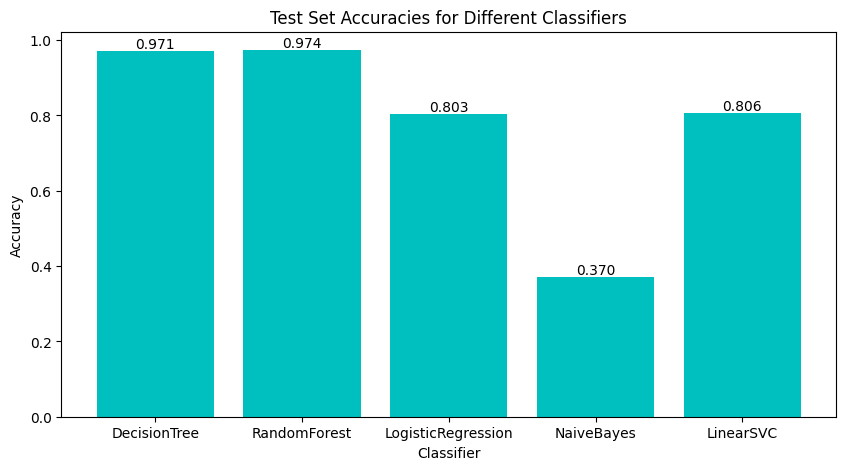

In [0]:
# Ploting a bar chart of the test accuracies 
import matplotlib.pyplot as plt

# Extract classifier names and accuracies
classifier_names = list(test_accuracies.keys())
accuracies = list(test_accuracies.values())

# Set up the plot
plt.figure(figsize=(10, 5))
bar_plot = plt.bar(classifier_names, accuracies, color='c')

# Add title and labels
plt.title('Test Set Accuracies for Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

# Add value labels on top of the bars
for rect in bar_plot:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., height, '{:.3f}'.format(height), ha='center', va='bottom')
    
    # Show the plot
plt.show()

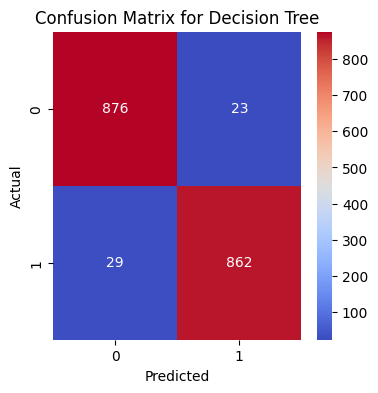

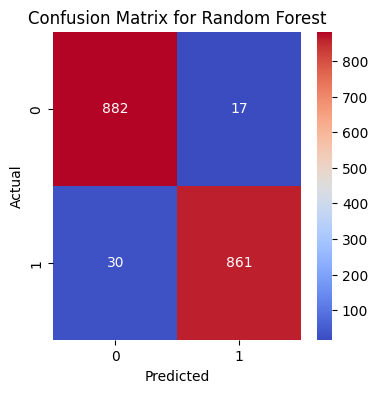

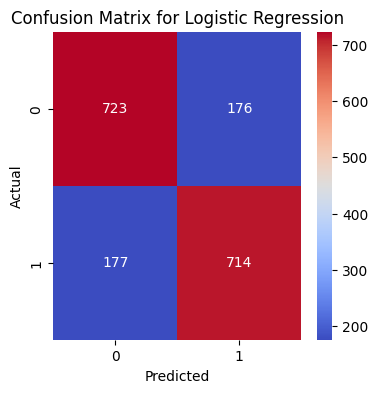

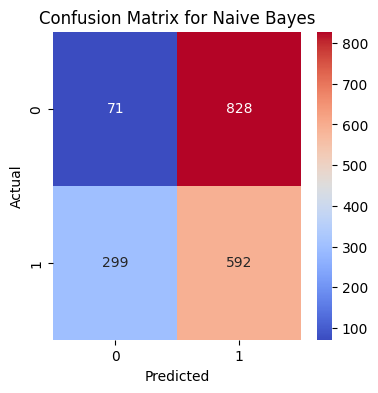

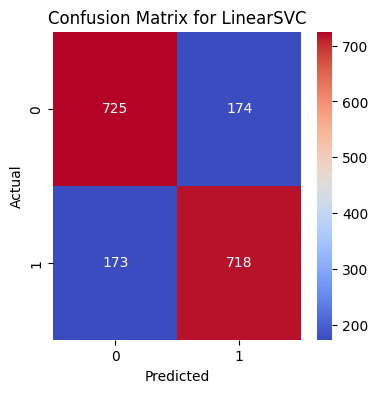

In [0]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for each classifier
cm_dt = confusion_matrix(predictions.select("fault_detected").toPandas(), predictions.select("prediction").toPandas())
cm_rf = confusion_matrix(predictions_rf.select("fault_detected").toPandas(), predictions_rf.select("prediction").toPandas())
cm_lr = confusion_matrix(predictions_lr.select("fault_detected").toPandas(), predictions_lr.select("prediction").toPandas())
cm_nb = confusion_matrix(predictions_nb.select("fault_detected").toPandas(), predictions_nb.select("prediction").toPandas())
cm_svc = confusion_matrix(predictions_svc.select("fault_detected").toPandas(), predictions_svc.select("prediction").toPandas())

# Define a function to plot the confusion matrix
def plot_confusion_matrix(cm, classifier_name):
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='g')
    plt.title(f"Confusion Matrix for {classifier_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot the confusion matrices for each classifier
plot_confusion_matrix(cm_dt, "Decision Tree")
plot_confusion_matrix(cm_rf, "Random Forest")
plot_confusion_matrix(cm_lr, "Logistic Regression")
plot_confusion_matrix(cm_nb, "Naive Bayes")
plot_confusion_matrix(cm_svc, "LinearSVC")